In [20]:
%matplotlib inline

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('netflix_titles_nov_2019.csv')
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
show_id         5837 non-null int64
title           5837 non-null object
director        3936 non-null object
cast            5281 non-null object
country         5410 non-null object
date_added      5195 non-null object
release_year    5837 non-null int64
rating          5827 non-null object
duration        5837 non-null object
listed_in       5837 non-null object
description     5837 non-null object
type            5837 non-null object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [23]:
missing = df.isnull().sum()
missing[missing>0]

director      1901
cast           556
country        427
date_added     642
rating          10
dtype: int64

### Data Cleaning

drop duplicated values

In [24]:
df[df[['title','director','type','release_year']].duplicated(keep=False)] #this gives all including main

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
957,80233218,Kakegurui,NaN,"Minami Hamabe, Mahiro Takasugi, Aoi Morikawa",Japan,NaN,2019,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Thrillers",Yumeko Jabami enrolls at Hyakkaou Private Acad...,TV Show
1134,80175351,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,NaN,2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show
1740,81075235,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie


In [25]:
df[df[['title','director','type','release_year']].duplicated()] #this gives all duplicate except first

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1134,80175351,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,NaN,2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie


In [26]:
df = df.drop_duplicates(['title','director','type','release_year'])

drop show_id

In [27]:
df = df.drop('show_id',axis=1)

In [28]:
df.cast.isnull().sum()

556

In [29]:
df['cast'] = df['cast'].replace(np.nan,'Unkown')

In [30]:
# lets have another column with count of cast
def count_of_cast(cast):
    if cast == 'Unknown':
        return 0
    else:
        return (len(cast.split()))
    

df['no_of_cast'] = df['cast'].apply(count_of_cast)

df['cast'] = df['cast'].replace('Unknown',np.nan)

In [31]:
df.reset_index()

,index,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,no_of_cast
0,0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,16
1,1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2
2,2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,17
3,3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,18
4,4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,21
5,5,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,17
6,6,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,13
7,7,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie,12
8,8,La Reina del Sur,NaN,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",NaN,2019,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",This compelling show tells the story of the le...,TV Show,28
9,9,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",NaN,"November 29, 2019",2018,TV-14,118 min,"Comedies, International Movies",Two mooching friends vie for the attention of ...,Movie,31


In [32]:
df['rating'] = df.rating.fillna(df['rating'].mode()[0])

In [42]:
df['date_added'] = df.date_added.fillna(f'January 1 {df["release_year"].mode()[0]}')

                        
def year(year):
    return year.split()[-1]
                                        
df['year_added'] = df.date_added.apply(year)

let's now google the categories and explore them

- TV-MA:This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

- TV-14:This program contains some material that many parents would find unsuitable for children under 14 years of age.
- TV-PG:This program contains material that parents may find unsuitable for younger children.
- R:Under 17 requires accompanying parent or adult guardian,Parents are urged to learn more about the film before taking their young children with them.
- PG-13:Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.
- NR or UR:If a film has not been submitted for a rating or is an uncut version of a film that was submitted
- PG:Some material may not be suitable for children,May contain some material parents might not like for their young children.
- TV-Y7:This program is designed for children age 7 and above.
- TV-G:This program is suitable for all ages.
- TV-Y:Programs rated TV-Y are designed to be appropriate for children of all ages. The thematic elements portrayed in programs with this rating are specifically designed for a very young audience, including children ages 2-6.
- TV-Y7-FV:is recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence.
- G:All ages admitted. Nothing that would offend parents for viewing by children.
- NC-17:No One 17 and Under Admitted. Clearly adult. Children are not admitted.

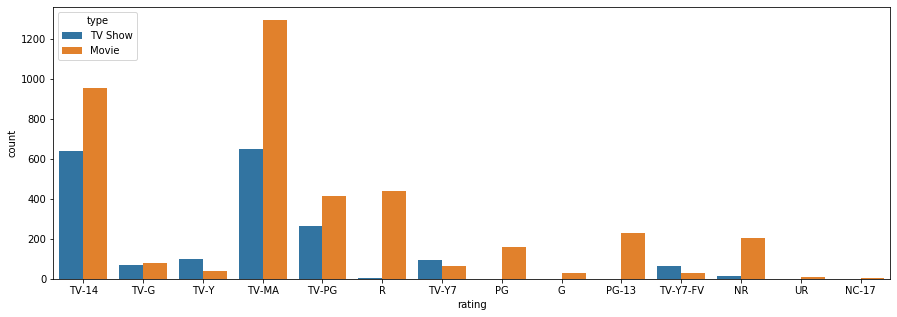

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(df.rating,hue='type',data=df)

- clearly there is a hike in adult content and specially in movies

In [44]:
df.country.value_counts().head(10)

United States     1907
India              696
United Kingdom     336
Japan              167
Canada             139
South Korea        133
Spain              113
France              85
Mexico              80
Turkey              78
Name: country, dtype: int64

we have huge number of countries in country column so we will focus on (United States,India,United Kingdom,Japan,Canada,Spain)

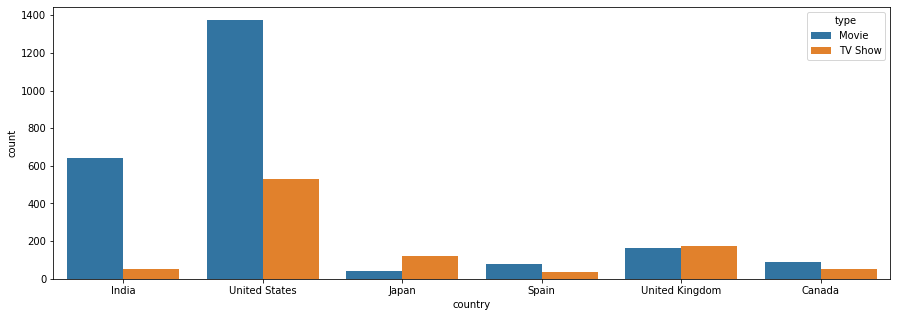

In [45]:
top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|(df['country']=='Japan')|
                             (df['country']=='Canada')|(df['country']=='Spain')]
plt.figure(figsize=(15,5))
sns.countplot(top_productive_countries.country,hue='type',data=top_productive_countries)

Clearly uk and japan produces more tv shows

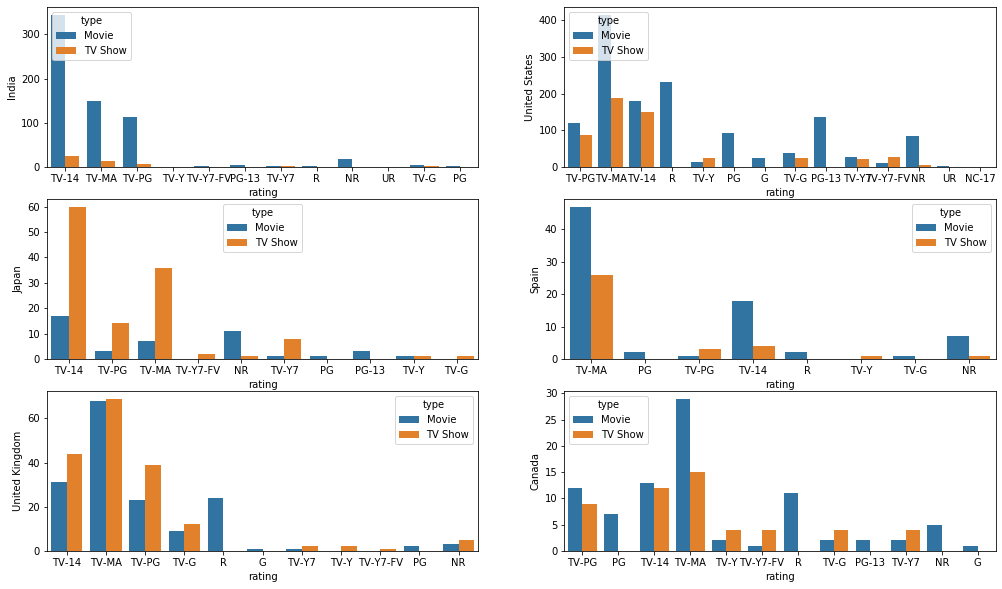

In [46]:
fig , axes = plt.subplots(3,2,figsize=(17,10))
dft = top_productive_countries
countries = list(dft.country.unique())
j=0
for i,ax in enumerate(fig.axes):
    sns.countplot(dft[dft['country']==countries[j]]['rating'],hue='type',ax=ax,data=dft)
    ax.set_ylabel(countries[j])
    j+=1
    


- India has a high rating in tv-14 ,tv-ma and tv-pg ie a hike in adult content in movies
- japan has high rate of content unsuitable for age below 14 in tv shows
- UK has a high rate of movie content that is not suitable for childen below 13


In [50]:
df.groupby(df.year_added)['type'].value_counts()


year_added  type   
2008        Movie         1
            TV Show       1
2009        Movie         2
2010        Movie         1
2011        Movie        13
2012        Movie         4
            TV Show       3
2013        Movie         6
            TV Show       3
2014        Movie        19
2015        Movie        58
            TV Show      16
2016        Movie       264
            TV Show     148
2017        Movie       913
            TV Show     271
2018        Movie      1291
            TV Show     979
2019        Movie      1366
            TV Show     476
Name: type, dtype: int64

We can say that Netflix begin to focus on TV-Shows,but Movies still has the lead in evey year

In [56]:
dup = df.title.duplicated()
df[dup]['title']


212                                      Drive
511                                     Tunnel
1244                                 Supergirl
1287                                 Limitless
1707                                    Shadow
2362                               Oh My Ghost
2412                                  Love O2O
2767                                    Bleach
2803                                   One Day
2873                             The Innocents
2934                          The Birth Reborn
3050                               Oh My Ghost
3214                               Us and Them
3435                                      Troy
3485                                 Locked Up
3585                                      Love
3587                              The Outsider
3593                                     Benji
3660                                      Solo
3671                               The Silence
3672                               The Silence
3884         

these titles have more than one type of content

In [63]:
for i in df[dup]['title'].values:
    print(df[df['title']==i][['title','type','release_year','country']])
    print()

     title   type  release_year        country
101  Drive  Movie          2011  United States
212  Drive  Movie          2019          India

       title     type  release_year      country
303   Tunnel  TV Show          2019          NaN
511   Tunnel  TV Show          2017  South Korea
4661  Tunnel    Movie          2016  South Korea

          title     type  release_year                        country
492   Supergirl    Movie          1984  United Kingdom, United States
1244  Supergirl  TV Show          2019                  United States

          title     type  release_year        country
474   Limitless    Movie          2017          India
1287  Limitless    Movie          2011  United States
5538  Limitless  TV Show          2016  United States

       title     type  release_year           country
154   Shadow    Movie          2018  China, Hong Kong
1707  Shadow  TV Show          2019               NaN

            title     type  release_year      country
775   Oh My Ghos

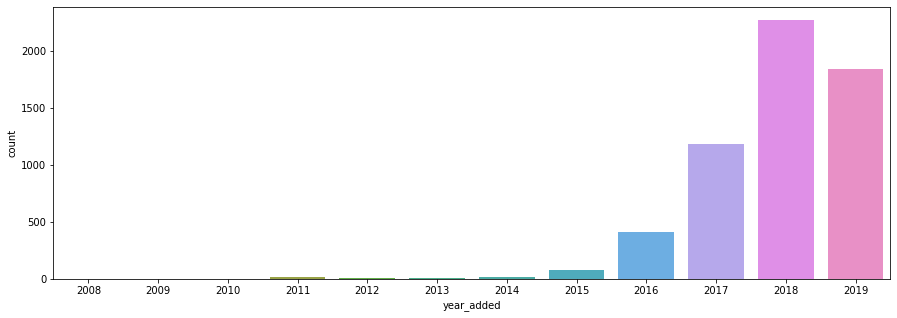

In [66]:
plt.figure(figsize=(15,5))
sns.countplot(df.year_added)

2018 was a remarkable year of netflix